<a href="https://colab.research.google.com/github/kmenzies28/ARCH4026_Practicals/blob/master/MESA_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Our MESA Tutorial**

The notebook below is owed to those working on the MESA project available @ https://mesa.readthedocs.io/en/master/tutorials/intro_tutorial.html [Last Accessed 04 December 2019]

The aim of this tutorial is for us to see **agents** exchanging **money** with one another. We are able to add in **space** so that agents can move.

This is an **agent-based economy** and essentially uses **statistics** to predict wealth distribution.

This is a very simplified Agent-Based Model, but it will illustrate how MESA works.

This tutorial will cover an agent-based economy, using statistics to measure wealth distribution.

MESA needs Python 3, no other version, to be able to run - so keep the code in this program!

These are the rules of our tutorial:
1. There are a number of agents,
2. Every agent in the simulation begins with a single unit of currency, and
3. An agent will give 1 unit of currency to another agent (if they have any) at each step of the model if they meet each other in the correct space

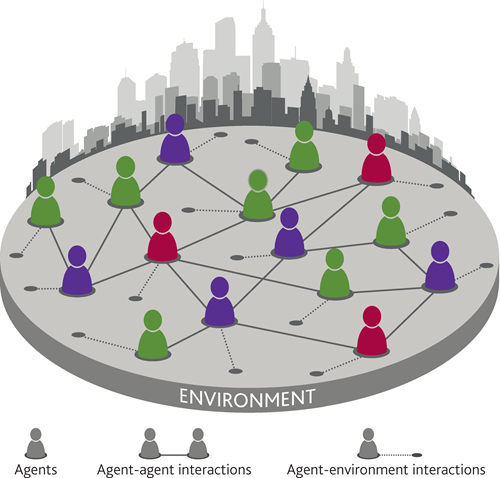

(Source: Turrell, A. (2016) *Agent-based models: understanding the economy from the bottom up*, available from: https://www.bankofengland.co.uk/quarterly-bulletin/2016/q4/agent-based-models-understanding-the-economy-from-the-bottom-up [last accessed 10 December 2019])

**PART I: Time to Install MESA!**

We need to install MESA as our first step.
As part of this, we also need to set-up [pipenv] which combines the virtual environment alongside the [dotenv] projects (this command will do the heavy-lifting installation works for us).

In [0]:
!pip install mesa

In [0]:
!pip install pipenv

A closed-off environment for us to work in has now been created.

In [0]:
import mesa
import numpy
import matplotlib

**PART II: Let's Build Our Sample Model**

So, to summarise so far, we have installed MESA. What we are going to do next is set up the model itself. 

The code we need to write to create our model is made up of two parts:
1. Code for the overall model:

 a. Which contains all  model-level characteristics, manages the agents and basically runs the global level of this model, and 

 b. Which will contain several agents.

2. Code for the agents :

  a. Who only have one variable - how much currency they currently hold, and

  b. Who have a unique identifier (like a name) which will be stored in [unique_id].


There is only one parameter that applies to the model - the number of agents which are withhin the model. Once a model begins, we want it to understand how to populate itself with the number of agents that we want it to have.

Both the code for the agents and for the model (respectively) begins as such below:

In [0]:
from mesa import Agent, Model

class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)

**PART III: Let's Add the Scheduler (Time Element)**

Note: with the majority of Agent-Based Models, time moves in what is called 'ticks' or 'steps'. Basically, at each one of these steps, each agent becomes 'activated' and takes one of their own actions/movements (interacting with each other or the environment within the simulation).

*What is the Scheduler?*

It is the part of the model which controlls the order in which the agents are activated - so like how time works for us, but not in the exact same sense that we experience it. We can manipulate this depending on if we want all the agents to move in the exact same order at every step, if we want this order shuffled etc. 

[RandomActivation] is the easiest command one can use in Mesa. It is demonstrated below.

This commands every agent to move together once per step in, you guessed it, a completely random order. 

Every single agent has what we call a [step] method, which is basically the action of the agent when they have been activated. By using the [add] function we can put an agent into the schedule. When the [step] method is activated in the schedule, this jumbles the order of the agents, and then activates every agent at once.

The code below is the same as that above but with the scheduler added on.

In [0]:
from mesa import Agent, Model
from mesa.time import RandomActivation

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        # The agent's step will go here.
        pass

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()

Don't panic if the model does not produce anything once you've pressed the 'play' buttons on all the lines of code, this does work.

To create the model object and run it, activate the code below (this will only activate for one step):

In [0]:
empty_model = MoneyModel(10)
empty_model.step()

**PART IV: Where Are Our Agents?**

Now, we need to make sure that the agents can:

1. Check their wealth, and
2. Give a unit of this money to a different random agent if they do have the currency.

[model.random] is basically a random-number generator and this allows an agent to select another at random (to pass on their unit of money). The smart thing about this is that we can re-run a specific model step(s) again.

We are going to need a list of every agent to be able to pick one of them at random. However, we do not get one of these. But - there is a list built into the scheduler as it will know what it is scheduled to activate.

So, see how we used the [step] method above? We are now going to modify it slightly:

In [0]:
class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        if self.wealth == 0:
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1

**PART V: Running the First Model**

Now, activate the next line to create your model - it will have 10 agents and it will run for 10 steps.

In [0]:
model = MoneyModel(10)
for i in range(10):
    model.step()

What is the point in running the model without extracting any data from it?

We want to see the distribution of the agent's wealth. We are actually able to retrieve the wealth values from the simulation and we can view this on a histogram using [matplotlib].

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

Don't worry if your histogram looks slightly different from the person sitting next to you, each run of the model is completely random so differences are expected.

Using a nested for loop, we can assess how a simulation behaves. This is where we launch several model runs to see the distribution that will appear from all of them.

In [0]:
all_wealth = []
for j in range(100):
    # Run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

plt.hist(all_wealth, bins=range(max(all_wealth)+1))

Basically, what we have done above is carry out 100 instantiations of our model, which is carried out for 10 steps.

**Agents can only have whole numbers assigned to their wealth, hencewhy the histogram shows integers only.*

If we look at this histogram compared to the last, it is clearly far more sleek as by running the simulation 100 times as opposed to just 10, the random behaviour calms and an overall expected pattern appears.


*Is this Unexpected?*

If we think about it - all agents act to give and recieve one unit of money at every stage of the simulation. But, the output we see above looks like most of the agents in the simulation have a little amount of currency and a few of the agents have a lot of money.

**PART VII: We Should Add Some Space**

This course is concerned with spatial analysis - so where is our spatial element?

We can use MESA to replicate these neighbour interactions.

MESA can host both grid and continuous spaces in a cell-format (the difference being that grids work like a chess board, so agents can only sit on a particlar cell within the board, whereas continuous spaces allow agents to move into any cell whatsoever). Regardless, both layouts mean that no cell will have fewer neighbours than others and any agent will not be able to go off the edge of the environment. This is because - if again we think about it like a chess board - each cell on its right edge is connected to another on its left edge, and likewise top to bottom. The term for this is **toroidal**.

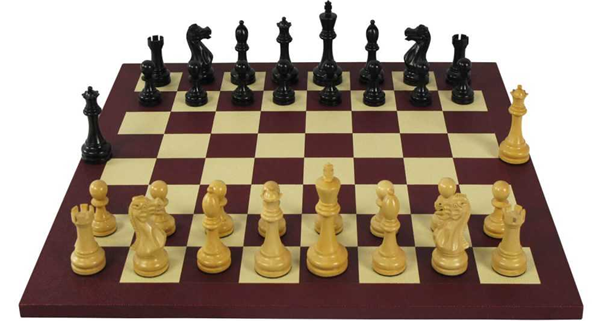

(Source: Geoffery Parker. (2019). *Luxury Leather Chess Board*, available from: https://www.geoffreyparker.com/leather-chessboards/ [last accessed 11 December 2019])

We are going to use a grid to start with as opposed to a continuous space. Again, this spatial element will be very simple. The agents will walk across the grid randomly, and only when they meet another agent on the same cell as them will they give them their unit of currency.

MESA commonly has 2 different types of grids:

1. A [SingleGrid] which only allows one agent at each cell, and

2. A [MultiGrid] which can have more than one agent to each cell.

It makes sense for us to use the [MultiGrid] function as we want to run a simulation that lets more than one agent to be in a cell at a time.

In [0]:
from mesa.space import MultiGrid

We will create a grid with width and height limits, and a boolean as to if the grid is toroidal. 

For the purposes of this simulation, the limits discussed above, the number of agents and the grid itself will be toroidal.

We can put agents on the grid with the [place_agent] method on the grid. This will take an agent and an X and Y sequence of the coordinates in order to place the individual.

In [0]:
class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)

            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

The agent's position is stored in the simulation in two ways:

1. In the cell that the agent is currently in (within the grid itself), and
2. By being assigned a [pos] variable wih an (x,y) coordinate tuple.
By using [place_agent] the coordinate is automatically assigned to the agent.

Our next step is to allow the agents to behave (to basically enable their movements around their respective environment and to make them aware that they may only pass currency to other agents within the same cell).

So, we will begin with movement. We need to let the agents move to adjacent cells. The grid that we are working with has a [move_agent] method which does such a thing. 

We still need to get to the potential adjacent cells. The grid has a pre-programmed [get_neighborhood] command which tells all agents to return to a given cell. 

In practice, this cell may appear either as:
1. Moore (which allows agents to move diagonally), and

2. Von Neumann (this has agents moving up, down, left or right).

We also need to assert if we will allow the centre cell to be classed as a neighbour cell.

See the agent's [move] command below:

In [0]:
class MoneyAgent(Agent):
   #...
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

Now, we need to put all of the other agents within one cell and give them some money.

We can get the contents of one or more cells using the grid's [get_cell_list_contents] method (or by accessing a cell directly). This method below can accept a list of cell coordinate tuples, (or just one if we only care about one cell).

Steps 40 to 43 inclusive shows what the agent's step method becomes after the above code.

In [0]:
class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()

Press play on the code below and we can run a model with 50 agents on a 10x10 grid which will be ran for 20 steps.

Of course, we can amend any of the numbers above to change details of the simulation if need be.

In [0]:
model = MoneyModel(50, 10, 10)
for i in range(20):
    model.step()

We will need [matplotlib] and [numpy] for the next step. These will help us to see the number of agents that sit in each cell.

We will create a [numpy] spread of the same size as the grid filled with 0s. We will then use the grid object's [coord_iter()] feature. This basically lets us loop over every cell in the grid, giving us each cell's coordinates and contents.

In [0]:
import numpy as np
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

If you replay the step above, the outcome will change on our chart. The outcomes can change drastically given that we have a random function in our code.

**PART VIII: Collecting the Data**

Notice that we've had to write a lot of code to retrieve data from the model. This is not efficient as to know the wealth of each agent at each step, we'd have to add that to the loop of executing steps and find out how to store the data at each point.

MESA does provide a programme that can data collect and store this for analysis.

MESA's [DataCollector] holds 3 types of data:

- Model-level variables (taking a model as an input),
- Agent-level variables (taking agent object as an input), and
- Tables (which will show any other data not included un the first 2 categories).

The [DataCollector] has model and agent-level variables and the ability to assemble them built into it. Both these variables then return a value from the model or agent at that point in the simulation.

When we use the [DataCollector]'s [collect] function when using a model object at its argument, this will administer each model-level collection function to the simulation and contains these outcomes within a dictionary (which will associate the current value with the likewise step of the simulation). The agent-level collection works in the same way, where the step of the model is related to the agent's [unique_id].

Below, we have added a [DataCollector] to the model which we will ask to collect 2 variables: 
1. At the agent level, this will be a collection of every agent's wealth at every step, and
2. At the model level, this will be a measurement of the model's [Gini] Coefficient (a measure of wealth inequality).

In [0]:
from mesa.datacollection import DataCollector

def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum( xi * (N-i) for i,xi in enumerate(x) ) / (N*sum(x))
    return (1 + (1/N) - 2*B)

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        self.datacollector = DataCollector(
            model_reporters={"Gini": compute_gini},  # `compute_gini` defined above
            agent_reporters={"Wealth": "wealth"})

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

Now, once we complete each step of the model, the [DataCollector] will basically gather and retain the present model-level [gini] coefficient (in addition to the wealth of every agent in connection each individual with the present step).

In [0]:
model = MoneyModel(50, 10, 10)
for i in range(100):
    model.step()

In order to get the series of [gini] coefficients as a pandas [DataFrame], run the following:

In [0]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

To get the [agent_wealth] data in simple numbers, run the following line:

In [0]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

The model step and agent ID are matched. To see a histogram of what each agent's wealth is at the end of the model, run the following:

In [0]:
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max()+1))

To plot the wealth of any given agent (in this case, agent 14), run the following:

In [0]:
one_agent_wealth = agent_wealth.xs(14, level="AgentID")
one_agent_wealth.Wealth.plot()

You can now adjust the code to find the wealth of any agent in our simulation.

**PART IX: Running the Simulation in Batches**

So, to reinforce from earlier, we would not run a model just one time - doing this means that we may not see the full and accurate picture. What multiple runs need alongside fixed perameters is an analysis of how this drives the model's outputs and behaviors.

The clever thing about MESA is that they have a built-in [BatchRunner] that automates this process so that we do not have to write multiple nested for-loops to carry out the same actions.

In [0]:
from mesa.batchrunner import BatchRunner

How do we control the model once a condition is met?

As we are using MESA's [MoneyModel] code, we need to input another variable for the [BatchRunner] to be able to work. Basically, the variable that we have written in below will close off the model and stop it running once the condition is met.

If you see below, we will use [True] for the entire simulation.

In [0]:
class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.running = True

        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        self.datacollector = DataCollector(
            model_reporters={"Gini": compute_gini},
            agent_reporters={"Wealth": "wealth"}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

We instantiate a [BatchRunner] with a model class to run, and 2 dictionaries: 
1. The first of the fixed parameters (mapping model arguments to values), and 
2. The other of varying parameters (mapping each parameter name to a sequence of values for it to take). 

The BatchRunner also accounts for how many model instantiations needed to create and run at each combination of the parameter values, and how many steps to run each instantiation for. 

Remeber that the [DataCollector] takes dictionaries of model? The [BatchRunner] also does this as well as agent-level reporters to collect. But unlike the [DataCollector], it will not gather the data every step of the model - only at the end of each run.




So, the command below we keep the height and width parameters fixed but we will vary the amount of agents present. The [BatchRunner] is told to run 5 instantiations of the simulation with each number of agents. This will be carried out for 100 steps each time. 

This will then gather the final Gini coefficient value.

See the code below as we have inputted and we can launch the [BatchRunner] programe:

In [0]:
fixed_params = {
    "width": 10,
    "height": 10
}

variable_params = {"N": range(10, 500, 10)}

# The variables parameters will be invoke along with the fixed parameters allowing for either or both to be honored.
batch_run = BatchRunner(
    MoneyModel,
    variable_params,
    fixed_params,
    iterations=5,
    max_steps=100,
    model_reporters={"Gini": compute_gini}
)

batch_run.run_all()

245it [01:57,  1.09it/s]


We can take this information that we have been gathering throughout this model and translate it into a [DataFrame].

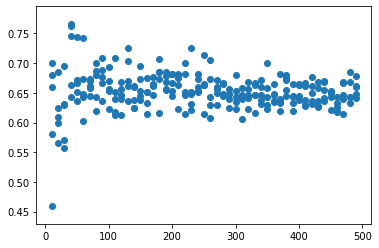

In [0]:
run_data = batch_run.get_model_vars_dataframe()
run_data.head()
plt.scatter(run_data.N, run_data.Gini)

The scatter-plot diagram above compares how many agents were in the simulation to the final Gini calculated.

So, although this graph looks like a scatter of points, each row represents the run of a model. This thereby shows us the values of the parameters of each of those runs.


**PART X: Extra Exercises to Complete**

So, that is a basic Mesa model, but how can we take this further?

*If you wish to build on this model, one can use JavaScript to create a visualisation for the model. Please see the website at the start of this workbook to access the instructions for this.*

Compare the scatter-plot diagram above to the graph below. This graph represents the type (and prestige) of ceramic vessels between all pairs of the 50 household units at Dongshanzui, Sanjia,and Erbuch (all information will be in Drennan et al. 2017 reading on list). 

Does our agent-based model prediction of spread of wealth between agents match the number of households in China with that same spread?

Does this help to explain how this distribution of wealth has occured at all?

Does this give us any sort of insight into how the social hierarchy of this society would have operated?

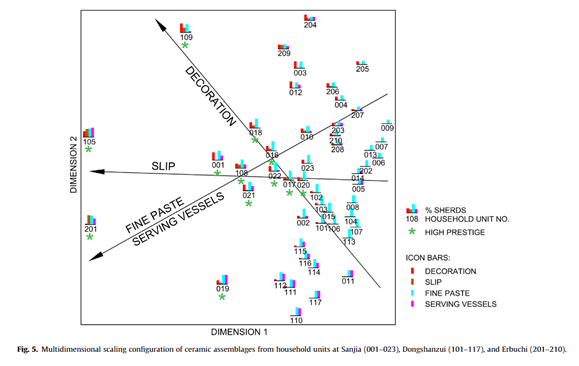

Compare representations (a) and (b) below with the chart that we produced to model 50 agents on our 10x10 grid (see: 'Part VII We Should Add Some Space' for the coloured chart) (all information is in Ortega et al. 2014 on the reading list).

Does model (a) or (b) suit the pattern shown in our chart? 

Why is this the case?

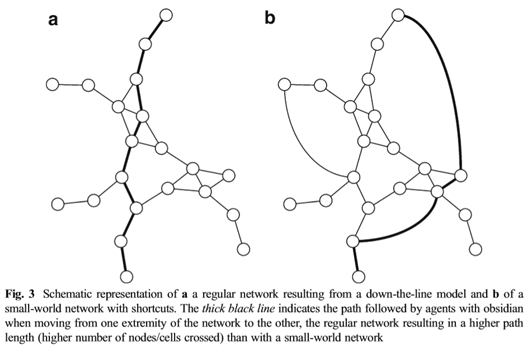